In [1]:
import re

In [2]:
with open("res_end.txt", "r") as file: 
    txt = file.read()
    

In [3]:
txt = txt.split("NEW MUTATE_PROB: ")[1:]

In [4]:
txt = [i.split("\n") for i in txt]

In [5]:
prob_time = {}
prob_value = {} 

In [6]:
for i in txt:
    prob_time[i[0]] = []
    prob_value[i[0]] = []
    for j in range(1, len(i)):
        if i[j].startswith("VALUE: "):
            prob_value[i[0]] += [int(re.sub("VALUE: ", "", i[j]))]
        if i[j].startswith("\tTIME: "):
            prob_time[i[0]] += [int(re.sub("\tTIME: ", "", i[j]))]
        

In [7]:
prob_time

{'0.000400': [124, 87, 111, 106, 60, 93, 104, 37, 65, 60],
 '0.000600': [86, 66, 176, 81, 83, 117, 96, 73, 67, 82],
 '0.000900': [118, 46, 55, 38, 55, 44, 88, 37, 40, 49],
 '0.001350': [61, 46, 56, 54, 81, 84, 39, 68, 58, 43],
 '0.002025': [62, 37, 52, 57, 37, 35, 36, 60, 55, 99],
 '0.003038': [36, 96, 36, 42, 60, 58, 50, 98, 38, 51],
 '0.004556': [38, 91, 57, 43, 57, 89, 77, 45, 42, 36],
 '0.006834': [77, 94, 36, 77, 74, 73, 94, 68, 79, 70],
 '0.010252': [48, 44, 49, 66, 52, 39, 39, 52, 76, 68],
 '0.015377': [48, 49, 97, 41, 125, 66, 49, 61, 80, 40]}

In [8]:
prob_value

{'0.000400': [45, 56, 41, 50, 50, 50, 51, 56, 53, 55],
 '0.000600': [46, 55, 54, 58, 57, 44, 53, 50, 56, 51],
 '0.000900': [51, 59, 47, 61, 55, 51, 52, 43, 50, 54],
 '0.001350': [48, 57, 53, 42, 54, 52, 60, 56, 37, 36],
 '0.002025': [57, 42, 50, 58, 56, 53, 67, 49, 59, 49],
 '0.003038': [53, 53, 57, 55, 43, 38, 54, 45, 52, 40],
 '0.004556': [48, 54, 50, 53, 53, 52, 49, 44, 56, 59],
 '0.006834': [45, 47, 57, 52, 49, 54, 53, 33, 54, 53],
 '0.010252': [47, 45, 56, 56, 54, 60, 52, 56, 55, 50],
 '0.015377': [54, 38, 46, 54, 50, 49, 60, 54, 48, 55]}

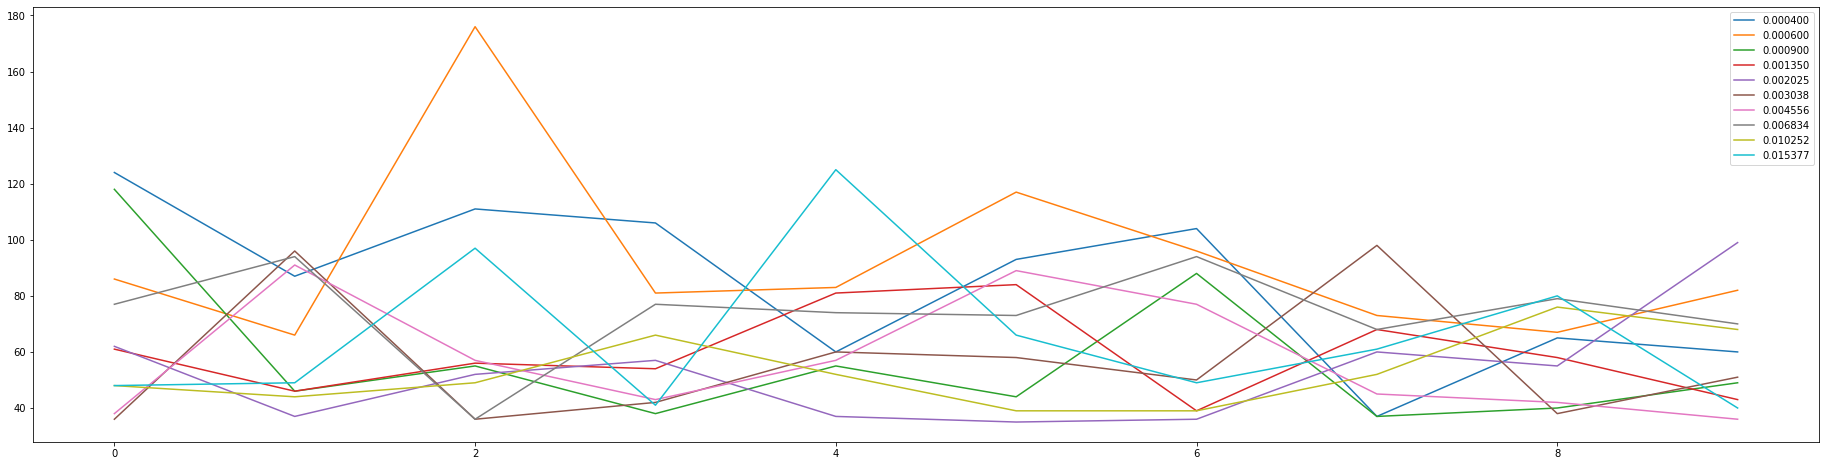

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 8))

for i in prob_time:
    plt.plot([i for i in range(len(prob_time[i]))], prob_time[i], label = i)
    
# for i in prob_time:
#     plt.plot([i for i in range(len(prob_time[i]))], prob_time[i], label = i)
  
# plot lines

plt.legend()
plt.savefig("Dependency_from_time_to_mut_prob.png")

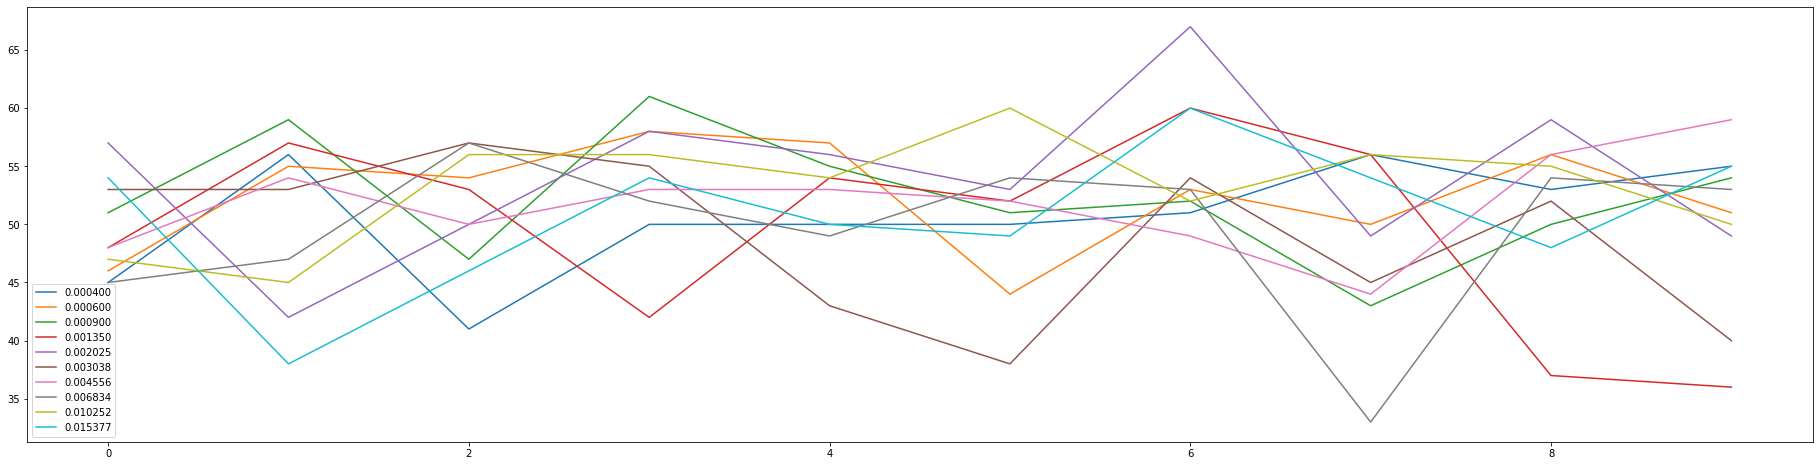

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 8))

for i in prob_value:
    plt.plot([i for i in range(len(prob_value[i]))], prob_value[i], label = i)
    
# for i in prob_time:
#     plt.plot([i for i in range(len(prob_time[i]))], prob_time[i], label = i)
  
# plot lines

plt.legend()
plt.savefig("Dependency_from_value_to_mut_prob.png")

In [11]:
prob_quality = {i : max(prob_value[i]) - min(prob_value[i]) for i in prob_value}

In [12]:
prob_quality

{'0.000400': 15,
 '0.000600': 14,
 '0.000900': 18,
 '0.001350': 24,
 '0.002025': 25,
 '0.003038': 19,
 '0.004556': 15,
 '0.006834': 24,
 '0.010252': 15,
 '0.015377': 22}

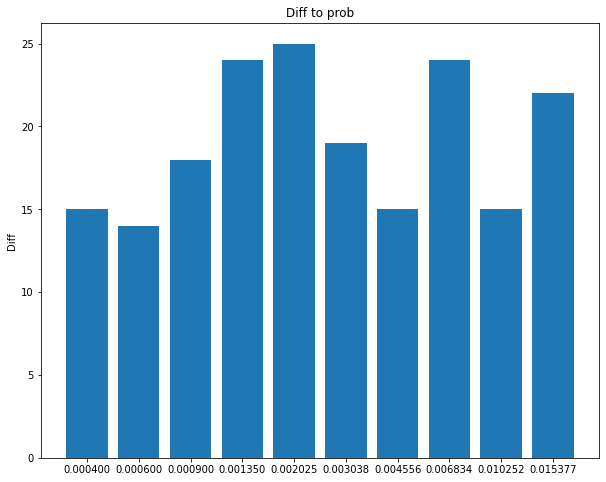

In [13]:
fig, ax = plt.subplots(figsize=(10,8))


fruits = [i for i in prob_quality]
counts = [prob_quality[i] for i in prob_quality]

ax.bar(fruits, counts)

ax.set_ylabel('Diff')
ax.set_title('Diff to prob')
#ax.legend(title='Fruit color')


plt.savefig("Dependency_from_diff_to_mut_prob.png")

In [14]:
prob_quality

{'0.000400': 15,
 '0.000600': 14,
 '0.000900': 18,
 '0.001350': 24,
 '0.002025': 25,
 '0.003038': 19,
 '0.004556': 15,
 '0.006834': 24,
 '0.010252': 15,
 '0.015377': 22}

In [15]:
prob_time

{'0.000400': [124, 87, 111, 106, 60, 93, 104, 37, 65, 60],
 '0.000600': [86, 66, 176, 81, 83, 117, 96, 73, 67, 82],
 '0.000900': [118, 46, 55, 38, 55, 44, 88, 37, 40, 49],
 '0.001350': [61, 46, 56, 54, 81, 84, 39, 68, 58, 43],
 '0.002025': [62, 37, 52, 57, 37, 35, 36, 60, 55, 99],
 '0.003038': [36, 96, 36, 42, 60, 58, 50, 98, 38, 51],
 '0.004556': [38, 91, 57, 43, 57, 89, 77, 45, 42, 36],
 '0.006834': [77, 94, 36, 77, 74, 73, 94, 68, 79, 70],
 '0.010252': [48, 44, 49, 66, 52, 39, 39, 52, 76, 68],
 '0.015377': [48, 49, 97, 41, 125, 66, 49, 61, 80, 40]}

In [16]:
import numpy as np
prob_time_mean = {i: np.mean(prob_time[i]) for i in prob_time}

In [17]:
prob_time_mean

{'0.000400': 84.7,
 '0.000600': 92.7,
 '0.000900': 57.0,
 '0.001350': 59.0,
 '0.002025': 53.0,
 '0.003038': 56.5,
 '0.004556': 57.5,
 '0.006834': 74.2,
 '0.010252': 53.3,
 '0.015377': 65.6}

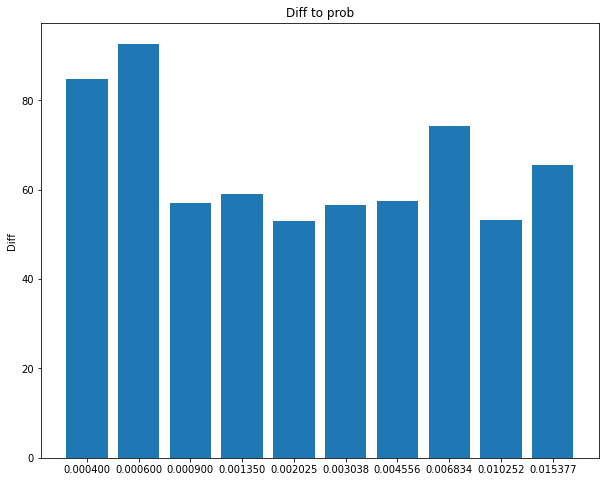

In [18]:
fig, ax = plt.subplots(figsize=(10,8))


fruits = [i for i in prob_time_mean]
counts = [prob_time_mean[i] for i in prob_time_mean]

ax.bar(fruits, counts)

ax.set_ylabel('Diff')
ax.set_title('Diff to prob')
#ax.legend(title='Fruit color')


plt.savefig("Dependency_from_mean_time_to_mut_prob.png")

In [19]:
import numpy as np
prob_value_max = {i: max(prob_value[i]) for i in prob_value}

In [20]:
prob_value_max

{'0.000400': 56,
 '0.000600': 58,
 '0.000900': 61,
 '0.001350': 60,
 '0.002025': 67,
 '0.003038': 57,
 '0.004556': 59,
 '0.006834': 57,
 '0.010252': 60,
 '0.015377': 60}

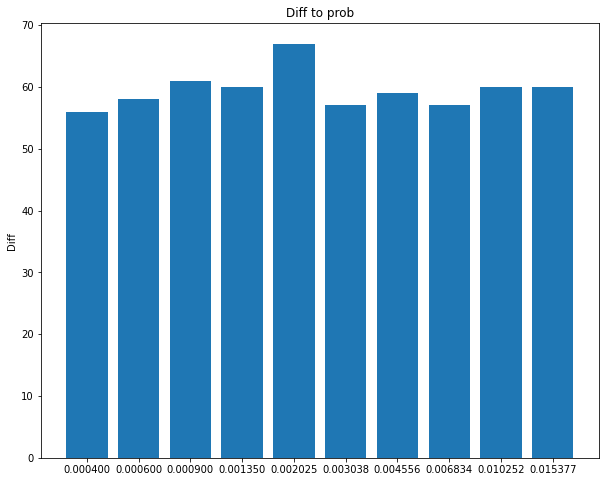

In [21]:
fig, ax = plt.subplots(figsize=(10,8))


fruits = [i for i in prob_value_max]
counts = [prob_value_max[i] for i in prob_value_max]

ax.bar(fruits, counts)

ax.set_ylabel('Diff')
ax.set_title('Diff to prob')
#ax.legend(title='Fruit color')


plt.savefig("Dependency_from_max_value_to_mut_prob.png")